In [62]:
import requests
import zipfile
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

# URL del dataset en Kaggle (funcionando con requests en tu caso)
url = "https://www.kaggle.com/api/v1/datasets/download/ensarakbas/premier-league-top-6-teams-match-statistics"

# Descargar el zip
response = requests.get(url, allow_redirects=True)

if response.status_code == 200:
    print("download completed ")

    # Abrir el zip desde memoria
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
        print("files in zip:", zip_file.namelist())

        # Filtrar solo archivos CSV
        csv_files = [name for name in zip_file.namelist() if name.endswith(".csv")]

        # Leer todos los CSVs en una lista de DataFrames
        dfs = []
        for name in csv_files:
            print(f"reading csv {name}...")
            df_temp = pd.read_csv(zip_file.open(name))
            df_temp["origen_csv"] = name  # opcional: para saber de qué archivo vino
            dfs.append(df_temp)

        # Concatenar todo en un único DataFrame
        df_final = pd.concat(dfs, ignore_index=True)

        aliquota = df_final.sample(n=50, random_state=32)

        # Guardar la alícuota en un CSV separado
        aliquota.to_csv("aliquota_test.csv", index=False)

        # Eliminar las filas seleccionadas del dataset original para entrenamiento
        df_final = df_final.drop(aliquota.index).reset_index(drop=True)

        print("df merged ready")
        print("final shape:", df_final.shape)
        df_final.head(5)
else:
    print("download failed:", response.status_code)



download completed 
files in zip: ['Arsenal.csv', 'Chelsea.csv', 'Liverpool.csv', 'Manchester City.csv', 'Manchester United.csv', 'Tottenham.csv']
reading csv Arsenal.csv...
reading csv Chelsea.csv...
reading csv Liverpool.csv...
reading csv Manchester City.csv...
reading csv Manchester United.csv...
reading csv Tottenham.csv...
df merged ready
final shape: (4144, 31)


In [63]:

df_final['club_name'] = df_final['origen_csv'].str.replace('.csv', '', regex=False)

df_final = df_final.drop(columns=['origen_csv'])



In [41]:
df_final.head(5)

,Date,Opponent,Is_Home,Result,Goals,Opponent_Goals,Possession,Shots,Shots_On_Target,Passes_Completed,Pass_Accuracy,Corners,Crosses,Fouls,Offsides,Opponent_Possession,Opponent_Shots,Opponent_Shots_On_Target,Opponent_Passes_Completed,Opponent_Pass_Accuracy,Opponent_Corners,Opponent_Crosses,Opponent_Fouls,Opponent_Offsides,Shot_Efficiency,Season,Month,Day_of_Week,Last5_Avg_Goals,Last5_Win_Rate,club_name
0,2013-08-04 18:20:00,Galatasaray,1,-1,1,2,55,12,5,425,80,4,2,12,2,45,12,6,399,81,5,3,15,2,0.416667,2013,8,7,1.000000,0.00,Arsenal
1,2013-08-17 17:00:00,Aston Villa,1,-1,1,3,64,15,4,457,87,4,4,15,3,36,10,5,216,71,3,2,19,1,0.266667,2013,8,6,1.000000,0.00,Arsenal
2,2013-08-21 21:45:00,Fenerbahçe,0,1,3,0,60,13,7,451,84,6,2,14,0,40,6,2,350,79,5,2,15,1,0.538462,2013,8,3,1.666667,0.33,Arsenal
3,2013-08-24 14:45:00,Fulham,0,1,3,1,54,19,9,496,87,8,9,9,0,46,16,7,421,87,1,1,10,3,0.473684,2013,8,6,2.000000,0.50,Arsenal
4,2013-08-27 21:45:00,Fenerbahçe,1,1,2,0,65,14,6,460,86,2,4,16,2,35,6,4,350,79,3,4,16,1,0.428571,2013,8,2,2.000000,0.60,Arsenal


In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4144 entries, 0 to 4143
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4144 non-null   object 
 1   Opponent                   4144 non-null   object 
 2   Is_Home                    4144 non-null   int64  
 3   Result                     4144 non-null   int64  
 4   Goals                      4144 non-null   int64  
 5   Opponent_Goals             4144 non-null   int64  
 6   Possession                 4144 non-null   int64  
 7   Shots                      4144 non-null   int64  
 8   Shots_On_Target            4144 non-null   int64  
 9   Passes_Completed           4144 non-null   int64  
 10  Pass_Accuracy              4144 non-null   int64  
 11  Corners                    4144 non-null   int64  
 12  Crosses                    4144 non-null   int64  
 13  Fouls                      4144 non-null   int64

In [28]:
df_final.describe()

,Is_Home,Result,Goals,Opponent_Goals,Possession,Shots,Shots_On_Target,Passes_Completed,Pass_Accuracy,Corners,Crosses,Fouls,Offsides,Opponent_Possession,Opponent_Shots,Opponent_Shots_On_Target,Opponent_Passes_Completed,Opponent_Pass_Accuracy,Opponent_Corners,Opponent_Crosses,Opponent_Fouls,Opponent_Offsides,Shot_Efficiency,Season,Month,Day_of_Week,Last5_Avg_Goals,Last5_Win_Rate
count,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000,4143.000000,4144.000000,4144.000000,4144.000000,4144.000000,4144.000000
mean,0.504344,0.349180,1.958253,1.075048,58.019788,15.143581,5.610763,477.937259,84.330116,5.976351,4.195946,10.751689,1.987693,41.958977,10.364624,3.624276,318.765444,77.222973,4.130309,3.383929,10.800193,2.073600,0.378714,2019.015685,6.627172,4.926400,1.957650,0.577667
std,0.500041,0.825279,1.486262,1.102918,10.907931,6.049829,2.835806,124.248427,5.029155,3.165393,2.671891,3.763318,1.650370,10.889002,4.895432,2.261880,116.718049,8.038196,2.626736,2.367827,3.731922,1.670444,0.147749,3.373806,3.818947,1.937507,0.733888,0.231944
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,51.000000,11.000000,4.000000,393.000000,81.000000,4.000000,2.000000,8.000000,1.000000,34.000000,7.000000,2.000000,230.000000,72.000000,2.000000,2.000000,8.000000,1.000000,0.277778,2016.000000,3.000000,3.000000,1.400000,0.400000
50%,1.000000,1.000000,2.000000,1.000000,59.000000,15.000000,5.000000,473.000000,85.000000,6.000000,4.000000,11.000000,2.000000,41.000000,10.000000,3.000000,304.000000,78.000000,4.000000,3.000000,11.000000,2.000000,0.368421,2019.000000,7.000000,6.000000,2.000000,0.600000
75%,1.000000,1.000000,3.000000,2.000000,66.000000,19.000000,7.000000,559.000000,88.000000,8.000000,6.000000,13.000000,3.000000,49.000000,13.000000,5.000000,392.000000,83.000000,6.000000,5.000000,13.000000,3.000000,0.466667,2022.000000,10.000000,7.000000,2.400000,0.800000
max,1.000000,1.000000,9.000000,7.000000,84.000000,58.000000,20.000000,979.000000,96.000000,20.000000,24.000000,25.000000,12.000000,80.000000,36.000000,16.000000,902.000000,95.000000,17.000000,16.000000,27.000000,11.000000,1.000000,2025.000000,12.000000,7.000000,6.000000,1.000000


In [33]:
dfnull = df_final.isnull().sum().reset_index()
dfnull.columns = ['column', 'nulls']
dfnull=dfnull.query(" nulls > 0")
dfnull['mean']=dfnull['nulls'].mean()



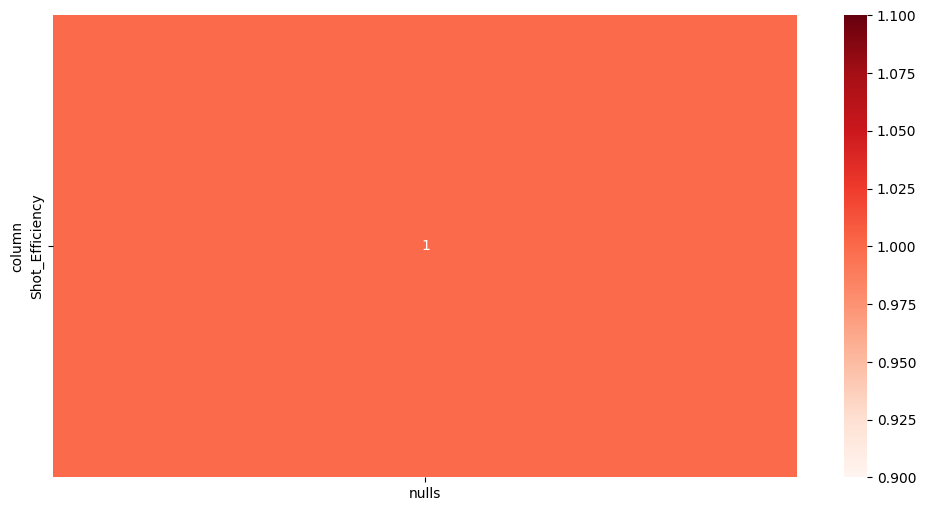

In [34]:
plt.figure(figsize=(12, 6))
sns.heatmap(dfnull[['nulls']].set_index(dfnull['column']), annot=True, cmap="Reds",fmt="d")
plt.show()


In [64]:
df_final['Shot_Efficiency']=df_final['Shot_Efficiency'].fillna(df_final['Shot_Efficiency'].mean())

In [65]:
df_final['Shot_Efficiency'].isnull().sum()

np.int64(0)

In [66]:
def preprocess_dates(df):
    """
     transforma columnas de fechas en columnas numéricas.
    
    Args:
        df (pd.DataFrame): DataFrame original
    
    Returns:
        pd.DataFrame: DataFrame con columnas de fecha convertidas a componentes numéricos
    """
    
    # Columnas de fechas a transformar
    dates_encode = ['Date']
    
    for col in dates_encode:
        if col in df.columns:
            # Convertir a datetime (auto detecta formato tipo 2013-08-04 18:20:00)
            df[col] = pd.to_datetime(df[col], errors='coerce')
            
            # Extraer componentes de fecha
            df[col + '_day']      = df[col].dt.day.fillna(0).astype('int32')
            df[col + '_month']    = df[col].dt.month.fillna(0).astype('int32')
            df[col + '_year']     = df[col].dt.year.fillna(0).astype('int32')
            df[col + '_weekday']  = df[col].dt.weekday.fillna(0).astype('int32')
            df[col + '_quarter']  = df[col].dt.quarter.fillna(0).astype('int32')
            
            # Extraer componentes de tiempo (por si querés usarlos también)
            df[col + '_hour']     = df[col].dt.hour.fillna(0).astype('int32')
            df[col + '_minute']   = df[col].dt.minute.fillna(0).astype('int32')
            df[col + '_second']   = df[col].dt.second.fillna(0).astype('int32')
    
    # Eliminar las columnas de fecha originales
    df.drop(columns=[c for c in dates_encode if c in df.columns], inplace=True)
    
    return df


In [67]:
df_final=preprocess_dates(df_final)
df_final.head(5)

,Opponent,Is_Home,Result,Goals,Opponent_Goals,Possession,Shots,Shots_On_Target,Passes_Completed,Pass_Accuracy,Corners,Crosses,Fouls,Offsides,Opponent_Possession,Opponent_Shots,Opponent_Shots_On_Target,Opponent_Passes_Completed,Opponent_Pass_Accuracy,Opponent_Corners,Opponent_Crosses,Opponent_Fouls,Opponent_Offsides,Shot_Efficiency,Season,Month,Day_of_Week,Last5_Avg_Goals,Last5_Win_Rate,club_name,Date_day,Date_month,Date_year,Date_weekday,Date_quarter,Date_hour,Date_minute,Date_second
0,Galatasaray,1,-1,1,2,55,12,5,425,80,4,2,12,2,45,12,6,399,81,5,3,15,2,0.416667,2013,8,7,1.000000,0.00,Arsenal,4,8,2013,6,3,18,20,0
1,Aston Villa,1,-1,1,3,64,15,4,457,87,4,4,15,3,36,10,5,216,71,3,2,19,1,0.266667,2013,8,6,1.000000,0.00,Arsenal,17,8,2013,5,3,17,0,0
2,Fenerbahçe,0,1,3,0,60,13,7,451,84,6,2,14,0,40,6,2,350,79,5,2,15,1,0.538462,2013,8,3,1.666667,0.33,Arsenal,21,8,2013,2,3,21,45,0
3,Fulham,0,1,3,1,54,19,9,496,87,8,9,9,0,46,16,7,421,87,1,1,10,3,0.473684,2013,8,6,2.000000,0.50,Arsenal,24,8,2013,5,3,14,45,0
4,Fenerbahçe,1,1,2,0,65,14,6,460,86,2,4,16,2,35,6,4,350,79,3,4,16,1,0.428571,2013,8,2,2.000000,0.60,Arsenal,27,8,2013,1,3,21,45,0


In [50]:
df_final['Opponent'].drop_duplicates().shape

(478,)

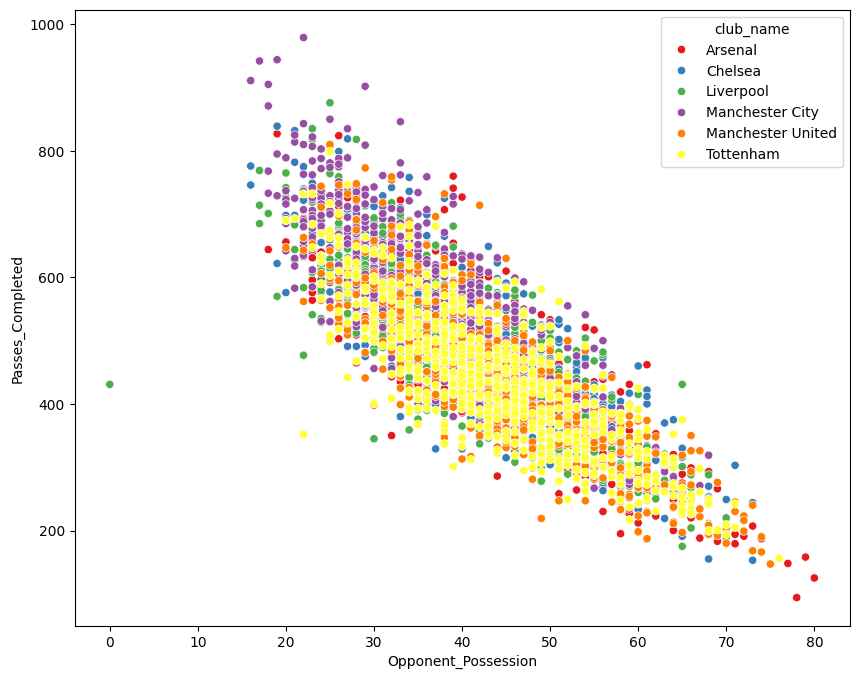

In [89]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Opponent_Possession', y='Passes_Completed', data=df_final, hue='club_name',palette='Set1')
plt.show()


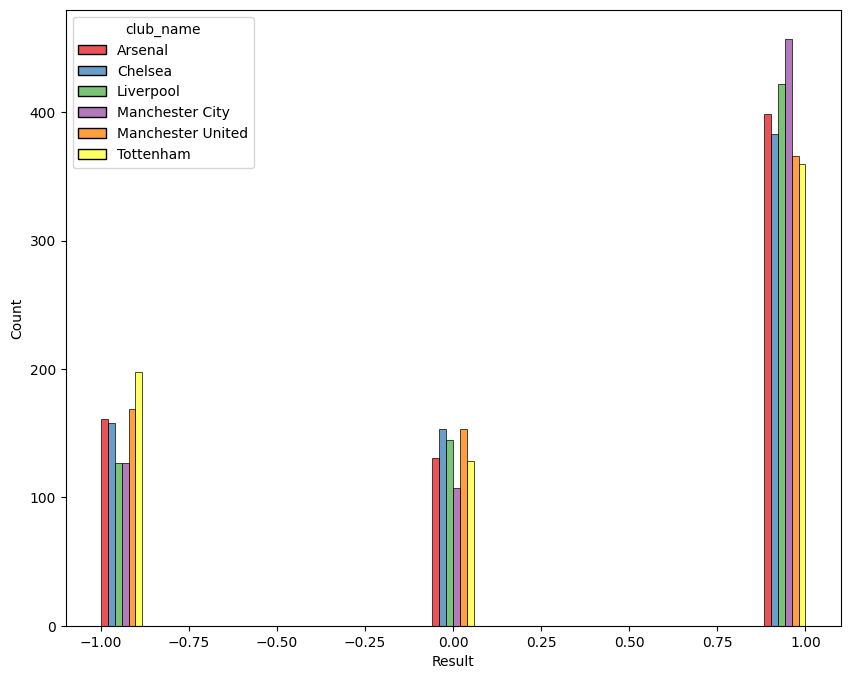

In [79]:

plt.figure(figsize=(10, 8))
sns.histplot(x='Result' ,data=df_final, hue='club_name',palette='Set1',multiple="dodge", )
plt.show()

In [60]:
from sklearn.preprocessing import LabelEncoder

# Los 6 equipos principales
main_teams = [
    "Liverpool", "Chelsea", "Arsenal",
    "Manchester City", "Manchester United", "Tottenham"
]

# Unir todos los valores de ambas columnas
all_teams = pd.concat([df_final['club_name'], df_final['Opponent']]).unique()

# Crear el encoder y ajustarlo
encoder = LabelEncoder()
encoder.fit(all_teams)

# Aplicar encoding a las columnas
df_final['club_name_enc'] = encoder.transform(df_final['club_name'])
df_final['opponent_enc']  = encoder.transform(df_final['Opponent'])
df_final = df_final.drop(columns=['club_name','Opponent'])

# Crear diccionario con los 6 equipos principales y su número
main_team_labels = {team: encoder.transform([team])[0] for team in main_teams}

print("📌 Labels de los equipos principales:")
print(main_team_labels)


📌 Labels de los equipos principales:
{'Liverpool': np.int64(219), 'Chelsea': np.int64(100), 'Arsenal': np.int64(18), 'Manchester City': np.int64(237), 'Manchester United': np.int64(239), 'Tottenham': np.int64(418)}


In [61]:
df_final.head(5)

,Is_Home,Result,Goals,Opponent_Goals,Possession,Shots,Shots_On_Target,Passes_Completed,Pass_Accuracy,Corners,Crosses,Fouls,Offsides,Opponent_Possession,Opponent_Shots,Opponent_Shots_On_Target,Opponent_Passes_Completed,Opponent_Pass_Accuracy,Opponent_Corners,Opponent_Crosses,Opponent_Fouls,Opponent_Offsides,Shot_Efficiency,Season,Month,Day_of_Week,Last5_Avg_Goals,Last5_Win_Rate,Date_day,Date_month,Date_year,Date_weekday,Date_quarter,Date_hour,Date_minute,Date_second,club_name_enc,opponent_enc
0,1,-1,1,2,55,12,5,425,80,4,2,12,2,45,12,6,399,81,5,3,15,2,0.416667,2013,8,7,1.000000,0.00,4,8,2013,6,3,18,20,0,18,159
1,1,-1,1,3,64,15,4,457,87,4,4,15,3,36,10,5,216,71,3,2,19,1,0.266667,2013,8,6,1.000000,0.00,17,8,2013,5,3,17,0,0,18,23
2,0,1,3,0,60,13,7,451,84,6,2,14,0,40,6,2,350,79,5,2,15,1,0.538462,2013,8,3,1.666667,0.33,21,8,2013,2,3,21,45,0,18,146
3,0,1,3,1,54,19,9,496,87,8,9,9,0,46,16,7,421,87,1,1,10,3,0.473684,2013,8,6,2.000000,0.50,24,8,2013,5,3,14,45,0,18,156
4,1,1,2,0,65,14,6,460,86,2,4,16,2,35,6,4,350,79,3,4,16,1,0.428571,2013,8,2,2.000000,0.60,27,8,2013,1,3,21,45,0,18,147
